In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/rameyamey/MLTSAProject/master/RF2.csv')

In [4]:
data2=pd.read_csv('https://raw.githubusercontent.com/rameyamey/MLTSAProject/master/RF2finalcoded.csv')

In [6]:
data.columns

Index(['Symbol', 'Company', 'Current CEO', 'Gender (1 female, 2 male)',
       'Date Employed', 'Age', 'Education Level',
       'Number of Children they have', 'sector', 'headquarters',
       'headquartersMSA', 'pop with % less than HS',
       'Estimate!!Total!!Total population',
       'Estimate!!Percent below poverty level!!Population for whom poverty status is determined',
       'Estimate!!Percent Male!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations!!Management, business, and financial occupations',
       'Estimate!!Percent Female!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations!!Management, business, and financial occupations',
       'implicit attitudes', 'exp1career', 'exp2fam'],
      dtype='object')

In [7]:
data['Date_Employed_2']=pd.to_datetime(data['Date Employed'])

In [8]:
data=data.rename(columns={'sector':'Sector','Gender (1 female, 2 male)':'Gender'})

In [9]:
data2.dtypes

CompanyNo                  int64
Gender                     int64
Age                        int64
Educationcoded           float64
children                 float64
sectorcode                 int64
popperlesshS             float64
population                 int64
popbelowpovlevel         float64
percentmenbusiness       float64
percentfemalebusiness    float64
implicitatt              float64
exp1career               float64
exp2fam                  float64
Slopeafterhire           float64
fullslope                float64
dtype: object

In [10]:
data['Days_as_CEO']=(pd.datetime.now()-data['Date_Employed_2'])/np.timedelta64(1,'D')

In [11]:
data.tail()

,Symbol,Company,Current CEO,Gender,Date Employed,Age,Education Level,Number of Children they have,Sector,headquarters,...,pop with % less than HS,Estimate!!Total!!Total population,Estimate!!Percent below poverty level!!Population for whom poverty status is determined,"Estimate!!Percent Male!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations!!Management, business, and financial occupations","Estimate!!Percent Female!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations!!Management, business, and financial occupations",implicit attitudes,exp1career,exp2fam,Date_Employed_2,Days_as_CEO
216,DHR,Danaher Corp.,Thomas P Joyce Jr.,2,9/1/2014,55,BS,4.0,Health Care Equipment,"Washington, D.C.",...,9.6,6138382,8.0,52.1,47.9,0.342364,4.349400,3.430855,2014-09-01,2086.941467
217,TFX,Teleflex,Liam Kelly,2,1/1/2018,53,Bachelor,NaN,Health Care Equipment,"Wayne, Pennsylvania",...,8.0,6069448,12.6,54.6,45.4,0.333241,4.347377,3.433144,2018-01-01,868.941467
218,SWKS,Skyworks Solutions,Liam Griffin,2,5/1/2016,53,MBA,NaN,Semiconductors,"Woburn, Massachusetts",...,7.0,4811732,9.8,53.7,46.3,0.343589,4.353727,3.460972,2016-05-01,1478.941467
219,CVS,CVS Health,Larry J Merlo,2,3/1/2011,64,BS,1.0,Health Care Services,"Woonsocket, Rhode Island",...,9.4,1615516,12.5,52.9,47.1,0.342665,4.177096,3.352179,2011-03-01,3366.941467
220,XRAY,Dentsply Sirona,Donald M Casey Jr,2,2/1/2018,59,MBA,NaN,Health Care Supplies,"York, Pennsylvania",...,7.3,444014,10.0,55.7,44.3,0.323369,4.227513,3.409574,2018-02-01,837.941467


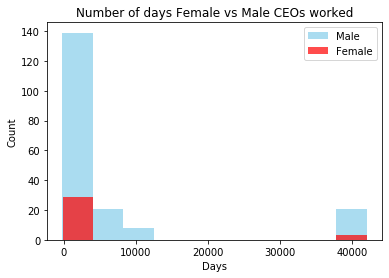

In [12]:
plt.hist(data['Days_as_CEO'][data['Gender']==2.0], color = "skyblue",alpha=0.7,label='Male')
plt.hist(data['Days_as_CEO'][data['Gender']==1.0], color='r',alpha=0.7,label='Female')

plt.title('Number of days Female vs Male CEOs worked')
plt.xlabel('Days')
plt.ylabel('Count')
plt.legend()
plt.savefig('days.png')
plt.show()


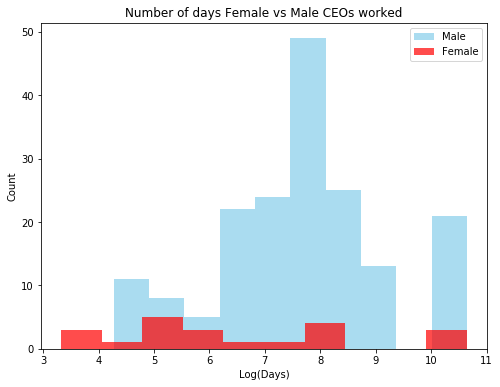

In [118]:
plt.figure(figsize=(8,6))
plt.hist(np.log(data['Days_as_CEO'][data['Gender']==2.0]), color = "skyblue",alpha=0.7,label='Male')
plt.hist(np.log(data['Days_as_CEO'][data['Gender']==1.0]), color='r',alpha=0.7, label='Female')

plt.title('Number of days Female vs Male CEOs worked')
plt.xlabel('Log(Days)')
plt.ylabel('Count')
plt.legend()
plt.savefig('log_days.png')
plt.show()


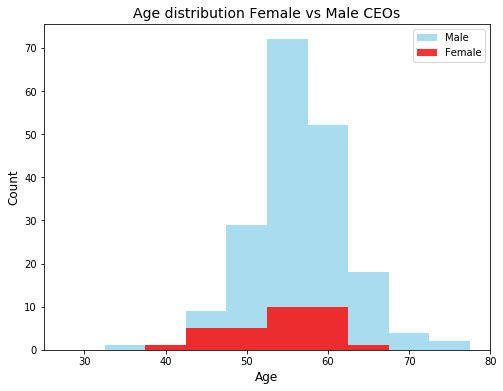

In [28]:
plt.figure(figsize=(8,6))
plt.hist(data['Age'][data['Gender']==2.0], color = "skyblue",alpha=0.7,label='Male',bins=(30,35,40,45,50,55,60,65,70,75,80),align='left', rwidth=1)
plt.hist(data['Age'][data['Gender']==1.0], color='r',alpha=0.8, label='Female',bins=(30,35,40,45,50,55,60,65,70,75,80),align='left', rwidth=1)
plt.title('Age distribution Female vs Male CEOs',size=14)
plt.xlabel('Age',size=12)
plt.ylabel('Count',size=12)
plt.legend()
plt.savefig('age.png')
plt.show()

In [87]:
data2=data[data['Education Level'].notna()]

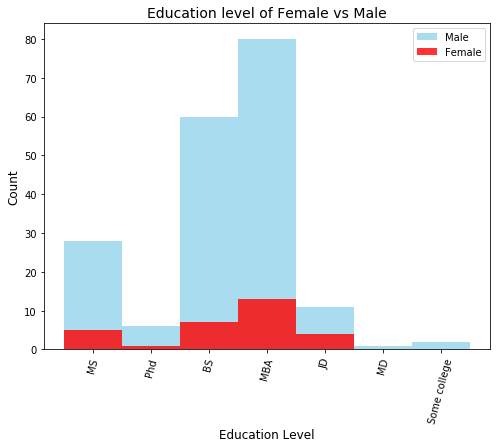

In [163]:
fig,ax=plt.subplots(figsize=(8,6))
plt.hist(data2['Educationcoded'][data2['Gender']==2.0], color = "skyblue",alpha=0.7,label='Male',bins=range(1,9), align='left', rwidth=1)
plt.hist(data2['Educationcoded'][data2['Gender']==1.0], color='r',alpha=0.8, label='Female',bins=range(1,9), align='left', rwidth=1)
plt.title('Education level of Female vs Male',size=14)
plt.xlabel('Education Level',size=12)
plt.ylabel('Count',size=12)
plt.xticks(rotation=75)
ax.set_xticklabels(names)
plt.legend()
plt.savefig('edu.png')
plt.show()

In [135]:
data2[data2['Educationcoded']>=6]

,CompanyNo,Gender,Age,Educationcoded,children,sectorcode,popperlesshS,population,popbelowpovlevel,percentmenbusiness,percentfemalebusiness,implicitatt,exp1career,exp2fam,Slopeafterhire,fullslope
130,131,2,55,6.0,2.0,41,13.2,19990592,13.4,56.3,43.7,0.341155,4.336802,3.404641,0.009872,0.009872
151,152,2,66,7.0,NaN,44,11.3,9536428,12.5,55.3,44.7,0.346903,4.373612,3.451667,0.005104,0.005104
202,203,2,59,8.0,2.0,74,7.7,3809717,9.6,53.8,46.2,0.318363,4.365117,3.494928,0.000914,0.000914


In [162]:
names=['A','MS','Phd','BS','MBA','JD','MD','Some college','Doctor of letters']

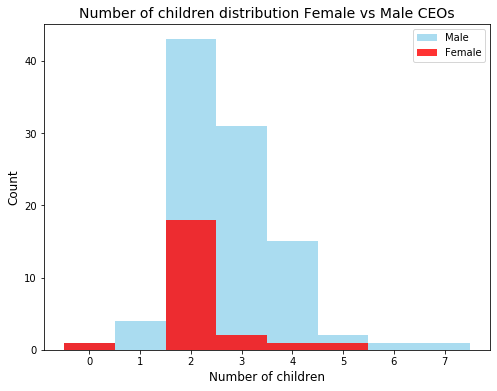

In [160]:
plt.figure(figsize=(8,6))
plt.hist(data['Number of Children they have'][data['Gender']==2.0], color = "skyblue",alpha=0.7,label='Male',bins=range(0,9), align='left', rwidth=1)
plt.hist(data['Number of Children they have'][data['Gender']==1.0], color='r',alpha=0.8, label='Female',bins=range(0,9), align='left', rwidth=1)

plt.title('Number of children distribution Female vs Male CEOs',size=14)
plt.xlabel('Number of children',size=12)
plt.ylabel('Count',size=12)
plt.legend()
plt.savefig('children.png')
plt.show()

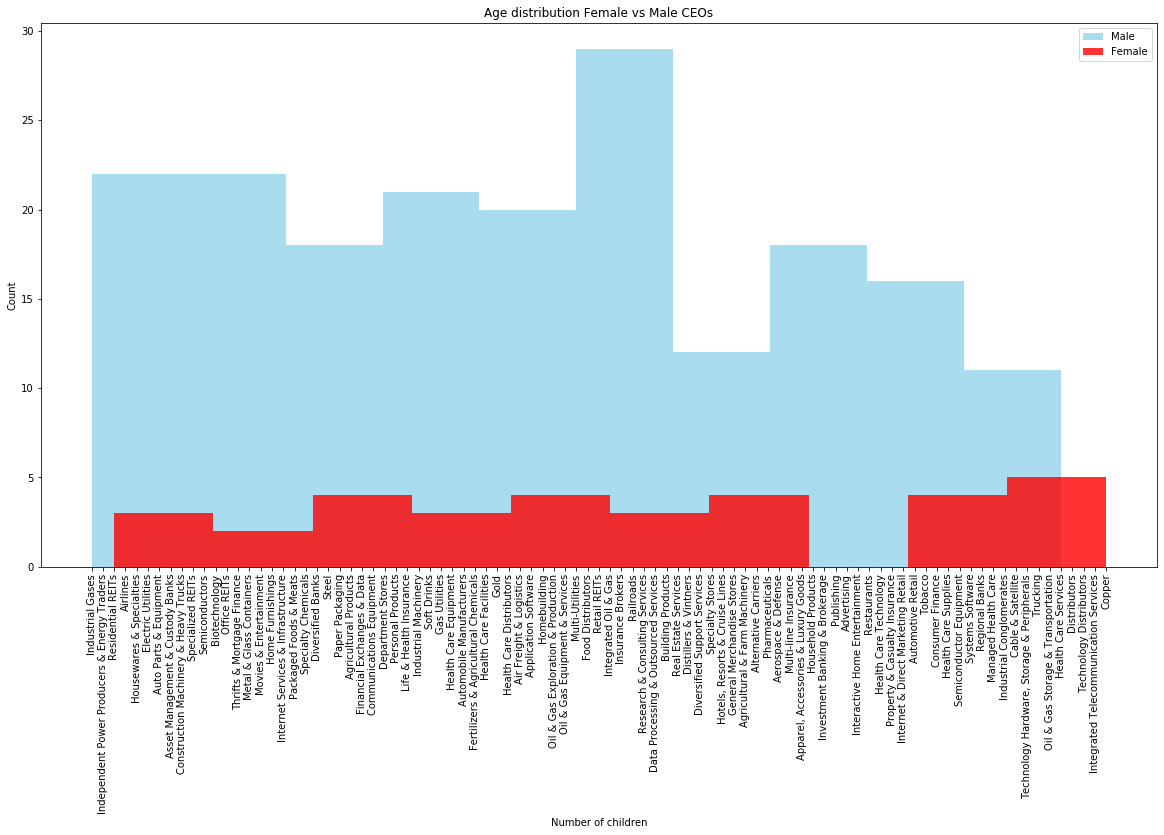

In [102]:
plt.figure(figsize=(20,10))
plt.hist(data['Sector'][data['Gender']==2.0], color = "skyblue",alpha=0.7,label='Male')
plt.hist(data['Sector'][data['Gender']==1.0], color='r',alpha=0.8, label='Female')

plt.title('Age distribution Female vs Male CEOs')
plt.xlabel('Number of children')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.savefig('sector.png')
plt.show()

In [25]:
data.groupby(['Gender','Sector']).count()['Current CEO'].reset_index()

,Gender,Sector,Current CEO
0,1,Aerospace & Defense,3
1,1,Application Software,1
2,1,Asset Management & Custody Banks,2
3,1,Automotive Retail,1
4,1,Building Products,2
...,...,...,...
109,2,Systems Software,2
110,2,"Technology Hardware, Storage & Peripherals",1
111,2,Thrifts & Mortgage Finance,1
112,2,Tobacco,2
